Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pygam import LogisticGAM, s, f

Load data set and devide training and validation data

In [3]:
data_a = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_b = np.load("../data/dataset_all_H1_bootstrap_O3b.npy")
data_total = np.vstack([data_a, data_b])

data_length = len(data_total)

training_set_length = int(data_length * 0.7)
validating_set_length = int(data_length * 0.2)
testing_set_length = data_length - training_set_length - validating_set_length

training_set = data_total[0:training_set_length, :]
validating_set = data_total[training_set_length:training_set_length + validating_set_length, :]
testing_set = data_total[training_set_length + validating_set_length:, :]

We now prepare the data into input parameters X and class Y.

In [4]:
data_X = training_set[:,0:6]
data_Y = training_set[:,6]

val_X = validating_set[:,0:6]
val_Y = validating_set[:,6]


Further, for now we want to do a binary classification (glitch vs insertion). Later, it might be useful to do multiclass, or other comparisions. (One could imagine ordering the glitches in terms of frequency signature/from low to high dominant frequency.)

We set insertion to Y=0 and glitches to Y=1.
Note that the data is not bootstrapped anymore now (I don't know if this is a problem)

In [5]:
binary_Y = [0 if data_Y == 0 else 1 for data_Y in data_Y]
binary_val_Y = [0 if val_Y == 0 else 1 for val_Y in val_Y]

We will now apply the GAM with logistic function

In [6]:
gam = LogisticGAM(n_splines=6).gridsearch(data_X, binary_Y)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
/Users/oussamabenchikhi/miniconda3/envs/py311/lib/python3.11/site-packages/pygam/links.py:135: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/Users/oussamabenchikhi/miniconda3/envs/py311/lib/python3.11/site-packages/pygam/links.py:136: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/Users/oussamabenchikhi/miniconda3/envs/py311/lib/python3.11/site-packages/pygam/links.py:151: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
/Users/oussamabenchikhi/miniconda3/envs/py311/lib/python3.11/site-packages/pygam/pygam.py:629: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2
  9% (1 of 11) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:16
/Users/oussamabenchikhi/miniconda3/envs/py311/lib/python3.11/site-packages/pygam/links.py:151: Runtim

And plot the output

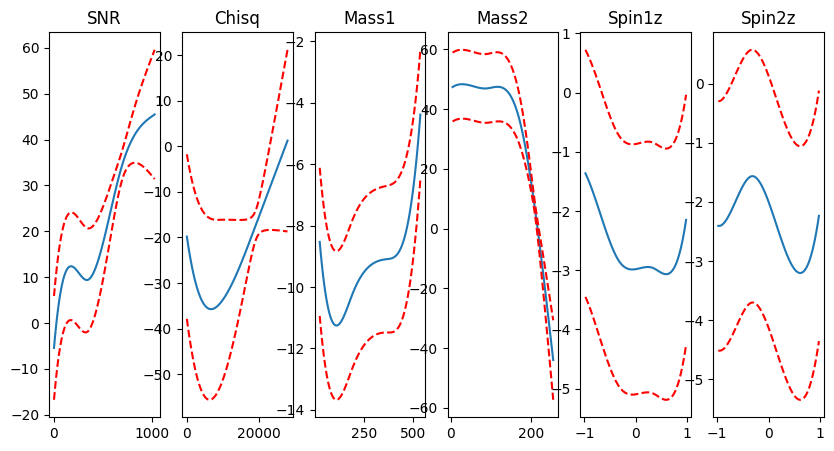

In [7]:
fig, axs = plt.subplots(1, 6, figsize=(10,5))
titles = ['SNR', 'Chisq', 'Mass1', 'Mass2', 'Spin1z', 'Spin2z']

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=0.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);

Check accuracy

In [8]:
gam.accuracy(val_X, binary_val_Y)

0.867526455026455

Eehhh this seems very close to me to 6/7 so does it work at all???

In [9]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                       24.23
Link Function:                        LogitLink Log Likelihood:                                -16100.3438
Number of Samples:                        52920 AIC:                                            32249.1475
                                                AICc:                                           32249.1726
                                                UBRE:                                               2.6098
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2552
Feature Function                  Lam

/var/folders/ch/t44_c_817qg9gbf20xr7hqq00000gn/T/ipykernel_85140/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
